In [1]:
from dataset_UNSW_NB15 import Dataset_UNSW_NB15
from dataset_UNSW_NB15_1 import Dataset_UNSW_NB15_1
from dataset_NSL_KDD import Dataset_NSL_KDD
from dataset_IoT_NID import Dataset_IoT_NID
from experiment import Experiment
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)   


X_ohe shape is: 161
X_num shape is: 39


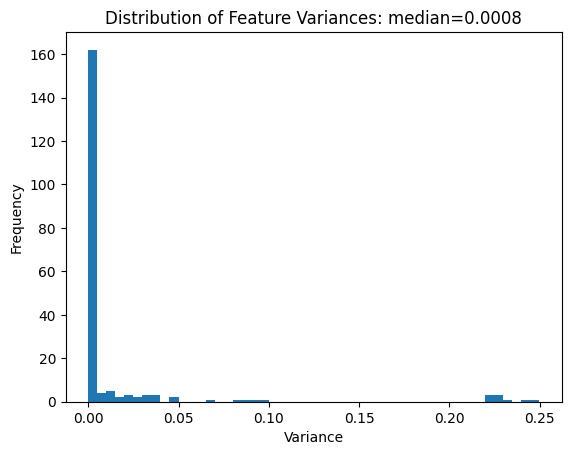

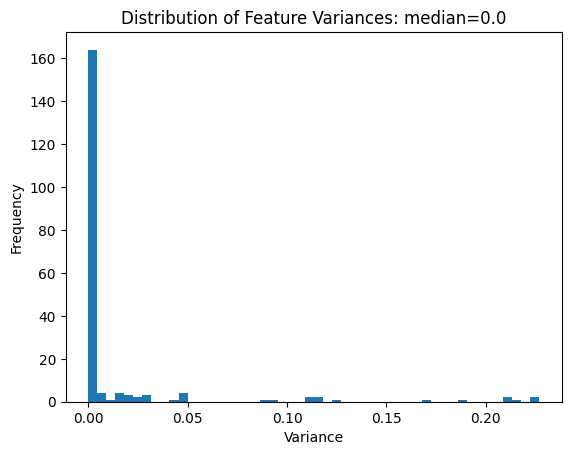

K-means clustering time: 269.241sec
Sampling time: 269.816sec
K-means clustering time: 74.296sec
Sampling time: 74.468sec
------------------------------
Feature selection: Variance k:500
Accuracy: 0.55
Attack Subsystem Accuracy: 0.55
Normal Subsystem Accuracy: 0.63
F1 Score: 0.4
F1 Score Attack: 0.4
F1 Score Normal: 0.61
Fit Time: 346.79s
Evaluate Time: 0.9s
------------------------------


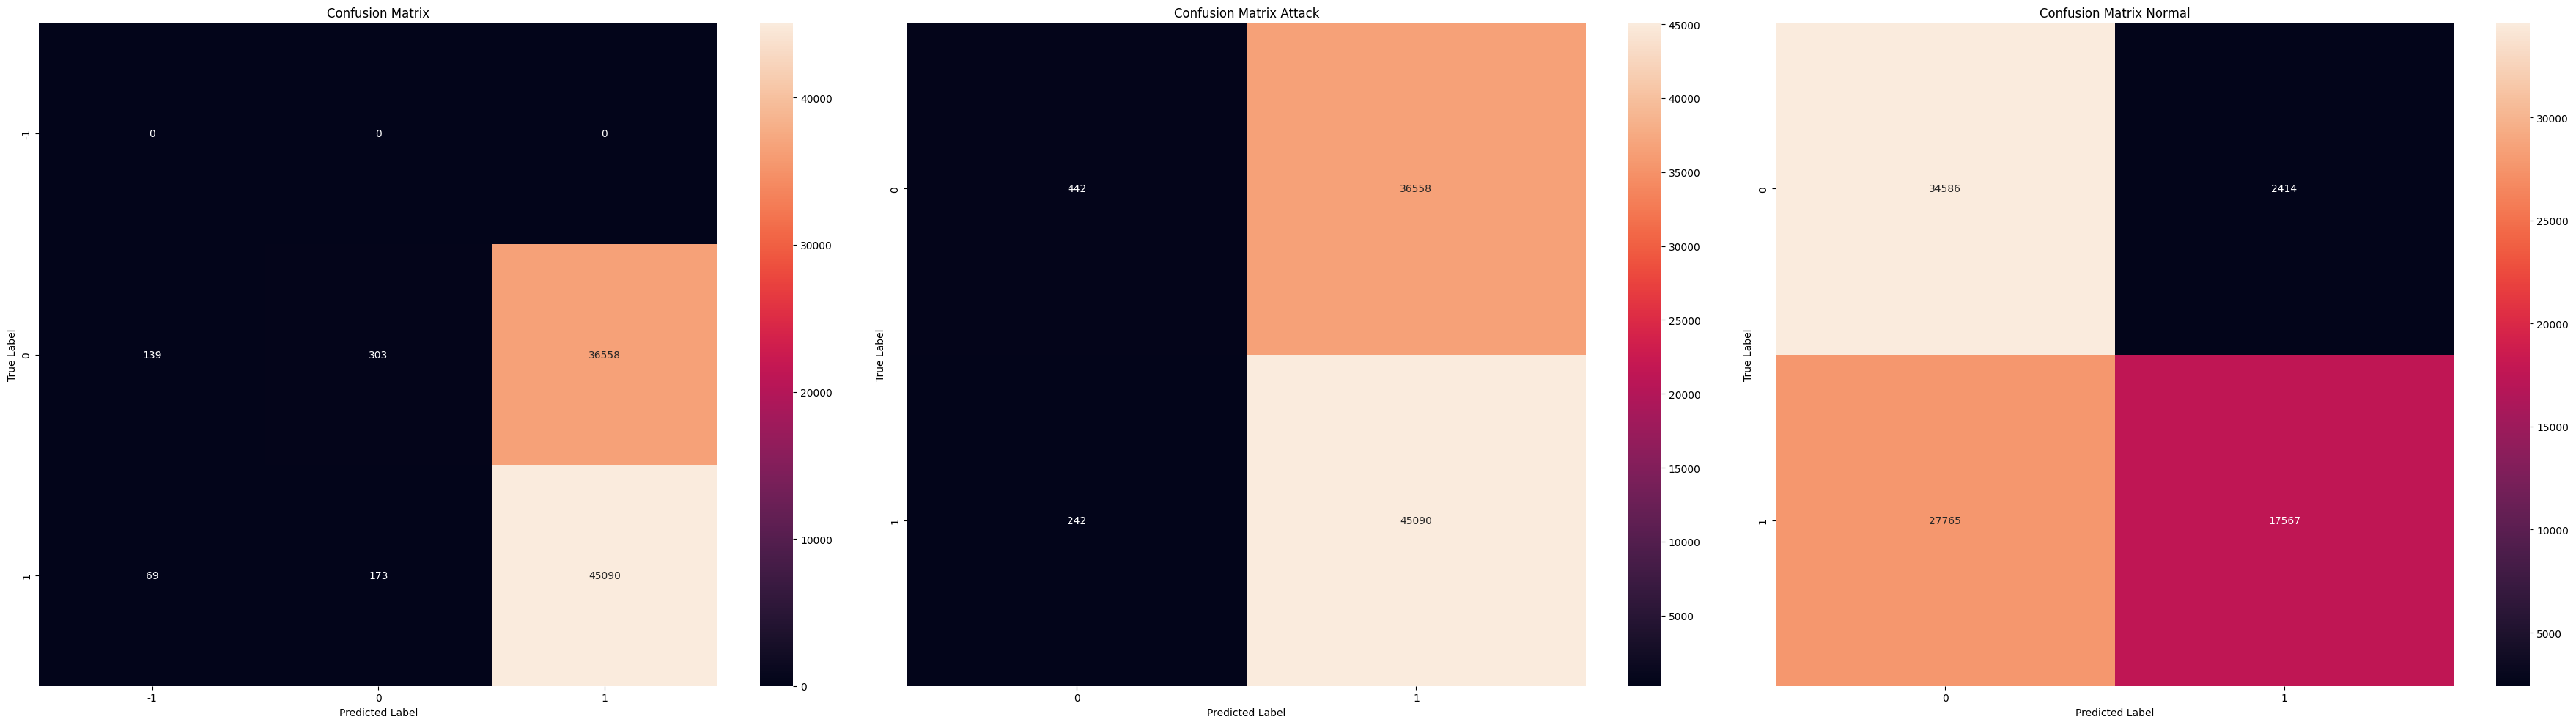

In [2]:
dataset = Dataset_UNSW_NB15()
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)
exp.run_noFS(k=500)
exp.run_pca(k=500, n_pca=30)
exp.run_fi(k=500, n_fi=10)
exp.run_hybrid(k=500, n_fi=20, n_pca=20)
exp.run_var(k=500)

In [ ]:
dataset = Dataset_NSL_KDD()
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)
exp.run_noFS(k=500)
exp.run_pca(k=500, n_pca=30)
exp.run_fi(k=500, n_fi=40)
exp.run_hybrid(k=500, n_fi=20, n_pca=20)
exp.run_var(k=500)

In [ ]:
dataset = Dataset_IoT_NID()
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)
exp.run_noFS(k=500)
exp.run_pca(k=500, n_pca=30)
exp.run_fi(k=500, n_fi=40)
exp.run_hybrid(k=500, n_fi=20, n_pca=20)
exp.run_var(k=500)

In [ ]:
dataset = Dataset_UNSW_NB15(1000000000)
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)
results = []
for i in range(10, 200, 10):
    exp.run_fi(k=5000000000, n_fi=i)
    results.append((exp.accuracy, exp.f1))  # タプルを作成

# accuracyとf1を別々にプロット
accuracy_results = [result[0] for result in results]
f1_results = [result[1] for result in results]

plt.plot(range(10, 200, 10), accuracy_results, label='accuracy')
plt.plot(range(10, 200, 10), f1_results, label='f1')
plt.legend()
plt.show()